In [1]:
# All the necessary imports

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc

In [2]:
# Dataset Load

data = load_breast_cancer()
X = data.data
y = data.target
print('Features shape:', X.shape)
print('Labels shape:', y.shape)
print('Feature names:', data.feature_names)


Features shape: (569, 30)
Labels shape: (569,)
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [3]:
from sklearn.model_selection import train_test_split

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training samples:', X_train.shape[0])
print('Test samples:', X_test.shape[0])


Training samples: 455
Test samples: 114


In [5]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('X_train_scaled shape:', X_train_scaled.shape)
print('X_test_scaled shape:', X_test_scaled.shape)


X_train_scaled shape: (455, 30)
X_test_scaled shape: (114, 30)


In [6]:
# Logistic Regression Model

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [7]:
# Predict on Test Data

y_pred = model.predict(X_test_scaled)

In [8]:
# Accuracy Calculation

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.97


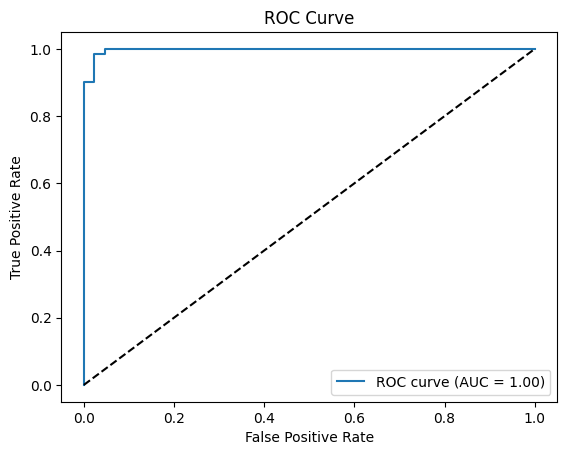

In [9]:
# Performance Metrics

from sklearn.metrics import roc_curve, auc
# Get probability scores for the positive class
y_score = model.decision_function(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [10]:
# Select 1st two features

X_vis = X[:, :2]  # Only first two features for visualization
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)

# Scale the two features
scaler_vis = StandardScaler()
X_train_vis_scaled = scaler_vis.fit_transform(X_train_vis)
X_test_vis_scaled = scaler_vis.transform(X_test_vis)


In [11]:
# New model

model_vis = LogisticRegression(max_iter=1000, random_state=42)
model_vis.fit(X_train_vis_scaled, y_train_vis)

LogisticRegression(max_iter=1000, random_state=42)

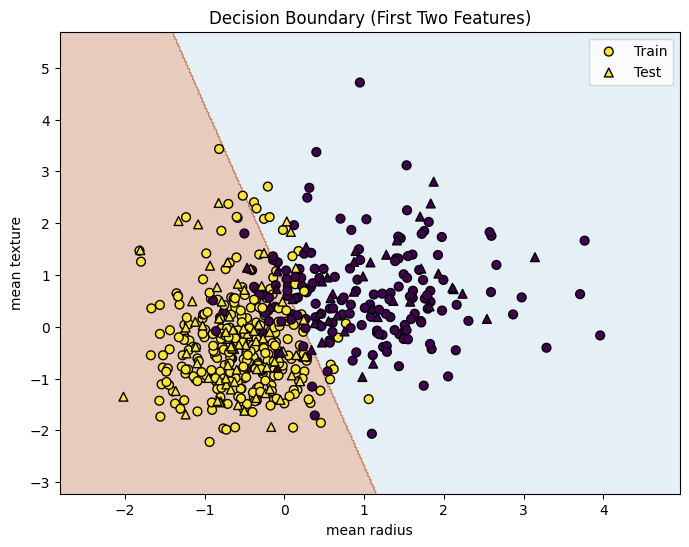

In [12]:
# Create a mesh grid
x_min, x_max = X_train_vis_scaled[:, 0].min() - 1, X_train_vis_scaled[:, 0].max() + 1
y_min, y_max = X_train_vis_scaled[:, 1].min() - 1, X_train_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict for each point in the mesh
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model_vis.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_train_vis_scaled[:, 0], X_train_vis_scaled[:, 1], c=y_train_vis, edgecolors='k', label='Train', s=40)
plt.scatter(X_test_vis_scaled[:, 0], X_test_vis_scaled[:, 1], c=y_test_vis, marker='^', edgecolors='k', label='Test', s=40)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title('Decision Boundary (First Two Features)')
plt.legend()
plt.show()